In [1]:
from src.utils import deserialize_data, serialize_data
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report


In [2]:
'''Deserialize data valid yang telah melewati preprocessing'''
X_valid = deserialize_data('data/processed/X_valid_prep.pkl')
y_valid = deserialize_data('data/processed/y_valid_prep.pkl')

Data deserialized from data/processed/X_valid_prep.pkl
Data deserialized from data/processed/y_valid_prep.pkl


In [3]:
'''Load file pickel model yang telah di train untuk setiap model'''

random_forest_model = deserialize_data('models/RandomForest_model.pkl')
logistic_regression_model = deserialize_data('models/LogisticRegression_model.pkl')
sgd_model = deserialize_data('models/SGD_model.pkl')

models = {
    'RandomForest': random_forest_model,
    'LogisticRegression': logistic_regression_model,
    'SGD': sgd_model
}

Data deserialized from models/RandomForest_model.pkl
Data deserialized from models/LogisticRegression_model.pkl
Data deserialized from models/SGD_model.pkl


Tuning RandomForest model...


/media/sandy/Data/Course/pacmann/ml_ops/MSANDY_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/sandy/Data/Course/pacmann/ml_ops/MSANDY_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/sandy/Data/Course/pacmann/ml_ops/MSANDY_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[{'model': 'RandomForest', 'threshold': np.float64(0.0), 'metric': 0.1797676779068456}, {'model': 'RandomForest', 'threshold': np.float64(0.010101010101010102), 'metric': 0.26101913823791206}, {'model': 'RandomForest', 'threshold': np.float64(0.020202020202020204), 'metric': 0.3375071384355204}, {'model': 'RandomForest', 'threshold': np.float64(0.030303030303030304), 'metric': 0.40273600520508546}, {'model': 'RandomForest', 'threshold': np.float64(0.04040404040404041), 'metric': 0.45669637094351656}, {'model': 'RandomForest', 'threshold': np.float64(0.05050505050505051), 'metric': 0.4963936792917194}, {'model': 'RandomForest', 'threshold': np.float64(0.06060606060606061), 'metric': 0.5304057234552839}, {'model': 'RandomForest', 'threshold': np.float64(0.07070707070707072), 'metric': 0.5573731875747124}, {'model': 'RandomForest', 'threshold': np.float64(0.08080808080808081), 'metric': 0.5802947382791169}, {'model': 'RandomForest', 'threshold': np.float64(0.09090909090909091), 'metric': 

/media/sandy/Data/Course/pacmann/ml_ops/MSANDY_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/sandy/Data/Course/pacmann/ml_ops/MSANDY_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/sandy/Data/Course/pacmann/ml_ops/MSANDY_VENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[{'model': 'LogisticRegression', 'threshold': np.float64(0.0), 'metric': 0.1797676779068456}, {'model': 'LogisticRegression', 'threshold': np.float64(0.010101010101010102), 'metric': 0.21527040086057808}, {'model': 'LogisticRegression', 'threshold': np.float64(0.020202020202020204), 'metric': 0.29839514076991114}, {'model': 'LogisticRegression', 'threshold': np.float64(0.030303030303030304), 'metric': 0.37141036316975856}, {'model': 'LogisticRegression', 'threshold': np.float64(0.04040404040404041), 'metric': 0.43303458481668167}, {'model': 'LogisticRegression', 'threshold': np.float64(0.05050505050505051), 'metric': 0.4813439174873537}, {'model': 'LogisticRegression', 'threshold': np.float64(0.06060606060606061), 'metric': 0.5177426973415051}, {'model': 'LogisticRegression', 'threshold': np.float64(0.07070707070707072), 'metric': 0.551136158928109}, {'model': 'LogisticRegression', 'threshold': np.float64(0.08080808080808081), 'metric': 0.578167318440608}, {'model': 'LogisticRegression

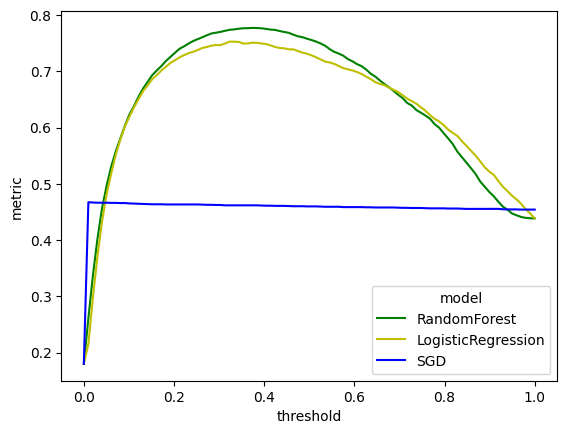

In [5]:
'''Fungsi threshold_tuning untuk mendapatkan nilai threshold dari model 
dan buat lineplotnya untuk setiap model, tambahkan warna yang beda untuk setiap model'''
def threshold_tuning(model_name, line_color, model, X_val, y_val):
    # Mendapatkan nilai predict_proba dari setiap model yang telah dilatih
    probabilities = model.predict_proba(X_val)[:, 1]
    
    thresholds = np.linspace(0, 1, 100)
    metrics_dict = []

    for threshold in thresholds:
        predictions = (probabilities >= threshold).astype(int)
        report = classification_report(y_val, predictions, output_dict=True)
        metric = report['macro avg']['f1-score']  
        
        metrics_dict.append({
            'model': model_name,
            'threshold': threshold,
            'metric': metric
        })

    # Plot metrics vs threshold
    df = pd.DataFrame(metrics_dict)
    print(metrics_dict)
    sns.lineplot(data=df, x='threshold', y='metric', hue='model', palette=[line_color])
    return metrics_dict

thresholds_info = {}

line_color = ['g','y','b']
for idx, obj in enumerate(models.items()):
    print(f"Tuning {obj[0]} model...")
    thresholds_info[obj[0]] = threshold_tuning(obj[0], line_color[idx], obj[1], X_valid, y_valid)



In [6]:
import json

'''Memilih threshold terbaik di antara semua model'''
def select_best_threshold(thresholds_info, output_path):
    all_thresholds = []

    for model_name, metrics_list in thresholds_info.items():
        df = pd.DataFrame(metrics_list)
        df['model'] = model_name
        all_thresholds.append(df)

    all_thresholds_df = pd.concat(all_thresholds)
    best_threshold = all_thresholds_df.sort_values(by='metric', ascending=False).iloc[0]

    best_threshold_info = {
        'model': best_threshold['model'],
        'threshold': best_threshold['threshold'],
        'metric': best_threshold['metric']
    }

    with open(output_path, 'w') as f:
        json.dump(best_threshold_info, f)

    return best_threshold_info

# Pilih best threshold dan simpan ke dalam file json
output_path = 'best_threshold.json'
best_threshold = select_best_threshold(thresholds_info, output_path)
print("Best threshold and model:", best_threshold)



Best threshold and model: {'model': 'RandomForest', 'threshold': np.float64(0.37373737373737376), 'metric': np.float64(0.7772053268942098)}


In [7]:
# deserialize data test
X_test = deserialize_data('data/processed/X_test_prep.pkl')
y_test = deserialize_data('data/processed/y_test_prep.pkl')

Data deserialized from data/processed/X_test_prep.pkl
Data deserialized from data/processed/y_test_prep.pkl


In [8]:
'''Fungsi evaluate_model untuk mengevaluasi model yang telah dilatih. 
Kemudian dapatkan nilai predict_proba serta classification report dari best model'''
def evaluate_model(model, selected_threshold, X_test, y_test):
    # Predict probabilities
    probabilities = model.predict_proba(X_test)[:, 1]
    # Apply threshold
    predictions = (probabilities >= selected_threshold).astype(int)
    # Print classification report
    report = classification_report(y_test, predictions)
    print(report)

# Load best threshold
import json

with open('best_threshold.json', 'r') as f:
    best_threshold_info = json.load(f)

# Memilih best model
best_model_name = best_threshold_info['model']
best_threshold = best_threshold_info['threshold']

# Mendapatkan the best model
best_model = models[best_model_name]

# Evaluasi best model
evaluate_model(best_model, best_threshold, X_test, y_test)


              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     11359
         1.0       0.66      0.65      0.65      3187

    accuracy                           0.85     14546
   macro avg       0.78      0.78      0.78     14546
weighted avg       0.85      0.85      0.85     14546



In [9]:
'''Print best model serta best threshold'''
print(best_model_name)
print(best_threshold)

RandomForest
0.37373737373737376
